<a href="https://colab.research.google.com/github/jrojasmo/EjerciciosML-2021-I/blob/main/Ejercicios2_ML_jrojasmo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introducción al Aprendizaje de Máquina 2021-I \\
*Jesús Andrés Rojas Montenegro*

#**1. Ejercicio 1.12**
Una amiga viene con un *learning problem*. Ella dice que la función objetivo $f$ es completamente desconocida, pero ella tiene $4000$ *data points*. Ella va a pagarte para que resuelvas su problema produciendo una función $g$ que se aproxime a $f$. De las opciones presentadas ¿qué es lo más seguro que pase?

<blockquote> 
<b>a.</b>  Después de aprender le darás a ella una función $g$ que garantizarás que se aproxime a $f$ y que tenga buenos resultados fuera de los datos de prueba.  
</blockquote>
<blockquote> 
<b>b.</b>   Después de aprender le darás a ella una función $g$ que con alta probabilidad se aproximará a $f$ y teniendo buenos resultados fuera de los datos de prueba.  
</blockquote>
<blockquote> 
<b>c.</b>   Pueden pasar dos cosas.  
<ol type="I"> 
<li>Podrás dar una hipótesis $g$;</li>
<li>Dirás que has fallado. </li>
</ol>
Si puedes devolver una hipótesis $g$, entonces con una alta probabilidad la $g$ que se produjo aproximará bien a $f$ fuera de la muestra dada.</blockquote>

**Respuesta**

Lo más seguro que pase es la opción **c.** porque se puede dar el caso en el que no sea posible dar una hipótesis (y por lo tanto no es **b.**, *e.g* el caso en el que el que los datos de muestra no sean linealmente separables para el caso del perceptrón y por lo tanto PLA retorne una mala hipótesis) o que la hipótesis dada se aproxime bien a $f$ en los datos de muestra y por tanto probablemente rinda bien fuera de esta, porque ya sabemos que deterministicamente no se puede asegurar nada del comportamiento de una hipótesis fuera de los *data points* (y entonces no puede ser **a.**).
  



In [60]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#**2. Problema 1.2**
Considera el perceptrón en dos dimensiones $h(x)=\textsf{sign}($**w**$^T$**x**$)$ dónde **w**$=[w_0,w_1,w_2]^T$ y **x**$=[1,x_1,x_2]^T$. Técnicamente, **x** tiene tres coordenadas, pero es un perceptrón de dos dimensiones porque la primera está fija en 1.   

**a.** Muestra que las regiones en el plano donde $h(x)=+1$ y $h(x)=-1$ están separadas por una línea. Si expresamos esta línea por la ecuación $x_2=ax_1+b$, ¿cómo sería la pendiente $a$ y la intercepción $b$ en términos de $w_0, w_1, w_2$?
 
**Prueba.** Por la definición de la función signo, tenemos los siguientes dos casos **w**$^T$**x**$>0$ ($h(x)=+1$) y **w**$^T$**x**$< 0$ y ($h(x)=-1$). Para el primer caso tenemos equivalentemente que
$$w_1+w_2x_1+w_3x_2 > 0,$$
y para el segundo
$$w_1+w_2x_1+w_3x_2 < 0.$$
Es decir, que lo que debe separar las regiones es el caso cuando es igual a cero,
$$w_1+w_2x_1+w_3x_2 = 0,$$
y despejando para $x_2$ obtenemos la ecuación de una recta:
$$x_2=-\frac{w_1}{w_2}x_1-\frac{w_0}{w_2}$$
con pendiente $a=-\frac{w_1}{w_2}$ e intercepción $b=-\frac{w_0}{w_2}$.

**b.** Graficar para los casos **w**$=[1,2,3]^T$ y **w**$=-[1,2,3]^T$.

Por lo hecho en el anterior punto es posible notar que ambos casos generan la misma línea recta con $a=-\frac{2}{3}$ y $b=-\frac{1}{3}$. Entonces sólo se va a mostrar el caso **w**$=[1,2,3]^T$.

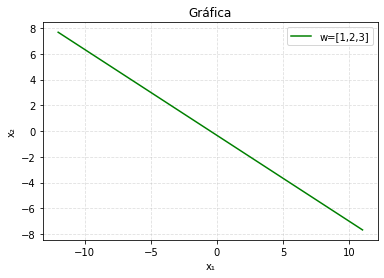

In [61]:
# Crear vector x_1
x1 = np.array(range(-12,12))
# Graficar
plt.plot(x1, -2/3*x1+(-1/3), label='w=[1,2,3]', color='g')

# Título
plt.title('Gráfica')
# Etiquetas
plt.xlabel('x₁')
plt.ylabel('x₂')
plt.legend()
# Grid
plt.grid(alpha=.4,linestyle='--')
# Mostrar gráfica
plt.show()

#**3. Problema 1.4**
Este problema requiere la solución del *Ejercicio 1.4*:
>Creemos nuestra propia función objetivo $f$ y el conjunto de datos $D$ y veámos cómo funciona el algoritmo del perceptrón. Tomar $d=2$ para poder visualizar el problema, y escoge una línea aleatoriamente como la función objetivo, donde uno de los pedazos de plano es mapeado a $+1$ y el otro a $-1$. Escoge los *inputs* **x**$_n$ del *data set* como puntos aleatorios del plano y después evalúalos con $f$ para tener la correspondiente salida $y_n$.
 
>Ahora, genera un *data set* de tamaño 20. Intenta usar el algoritmo del perceptrón en esos datos y mira cuánto tarda en converger a la función objetivo $f$. 


In [62]:
# Generar una línea en el plano aleatoriamente
## Función que retorna matriz de 2xlen con los arrays de x_1 y x_2 para graficarlos, pendiente e intercep.
def randomLine(len):
  intv= np.array(range(-100, 100+1))
  #Seleccionar pendiente aleatoriamente sobre el intv. [-100, 100]
  a= np.random.choice(intv)
  #Seleccionar intercep. aleatoriamente sobre el intv. [-100, 100]
  b= np.random.choice(intv)
  #Inicializar matriz
  x= np.zeros((2,len))
  # Vector de x_1 centrado en -b/a (x_2=0)
  mid= int(-b/a)
  len= int(len/2)
  if len%2==0:
    x[0]= np.array(range(mid-len, mid+len))
  else:
    x[0]= np.array(range(mid-len, mid+len+1))
  # Vector de x_2
  x[1]= a*x[0] + b
  return (x, a, b)

#Función que genera los puntos del data set con una func. obj. aleatoria
##Devuelve una matriz 3xnumData con las coordenadas de los puntos y el valor al que es mapeado
def genDataSet(numData, lenLine=100):
  #Generar función objetivo
  line, a, b = randomLine(lenLine) 
  #Inicializar matriz
  data= np.zeros((3,numData))
  #Obtener rangos para el data set para uqe se vean.
  x1Rang= line[0]
  x2Rang= np.array(range(int(np.amin(line[1])), int(np.amax(line[1]))))
  #Llenar la matriz
  for i in range(numData):
    #Elegir aleatoriamente coordenadas (ruido para que haya coordenadas reales)
    noise= np.random.random_sample() #[0, 1)
    x1 = np.random.choice(x1Rang) + noise
    noise= np.random.random_sample() #[0, 1)
    x2 = np.random.choice(x2Rang) + noise
    #Valor de +1 si está por encima de la recta, -1 caso contrario
    ans= 1 if x2>a*x1+b else -1
    data[:,i]= np.array([x1, x2, ans])
  
  return data, line

In [201]:
#Función de aprendizaje para el perceptrón
##Retorna vector de w con los pesos
def PLA(dataSet, maxIt=10000):
  #Transponer dataSet para mayor comodidad
  dataSet= dataSet.transpose()
  #Tomar aleatoriamente w(0) [0,1]
  w= np.random.rand(1,3)
  t=0
  n= int(dataSet.size/3)
  M=np.array([1])
  updates= 0
  while t<maxIt:
    M=np.empty((0,4))
    #Ver que punto está mal clasificados
    for i in range(n):
      x_i= np.append([1], dataSet[i][:-1])
      if dataSet[i][2]*w.dot(x_i) <= 0:
        row= np.append(x_i, [dataSet[i][2]], axis=0)
        M= np.append(M, [row.transpose()], axis=0)
        updates= updates+1
        break
    #Todos bien, entonces para ahí
    if M.size==0:
      break
    #Sumarlos todos para obtener el ajuste
    ajuSum = M[0][3]*M[0][:3]
    #Correción de pesos
    w= w+ajuSum
    t= t+1
  #print(updates)
  #print(t)
  return (w.flatten(), t)

**a.** Generar un *data set* linealmente separable de tamaño 20. Graficar los ejemplos $\{(x_n, y_n)\}$, la función objetivo $f$ en el plano.

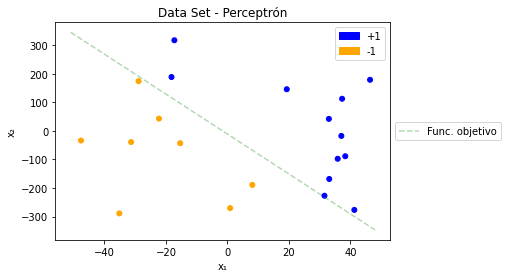

In [202]:
#Probar graficando para un dataset de tamaño 20 
dataSet, line= genDataSet(20)
colormap=np.array([0, 'blue','orange'])
plt.scatter(dataSet[0], dataSet[1], s=25, c=colormap[dataSet[2].astype(int)])
plt.plot(line[0], line[1], 'g--', alpha=0.3, label='Func. objetivo')
# Título
plt.title('Data Set - Perceptrón')
# Etiquetas
plt.xlabel('x₁')
plt.ylabel('x₂')
pop_a = mpatches.Patch(color='blue', label='+1')
pop_b = mpatches.Patch(color='orange', label='-1')
leg1= plt.legend(handles=[pop_a, pop_b])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().add_artist(leg1)
# Mostrar gráfica
plt.show()

**b.** Ejecutar PLA en el *data set* de antes. Decir el número de actualizaciones que toma antes de converger. Graficar los ejemplos $\{(x_n, y_n)\}$, la función objetivo $f$ en el plano y la hipótesis $g$. Comentar si $g$ es similar a $f$. 

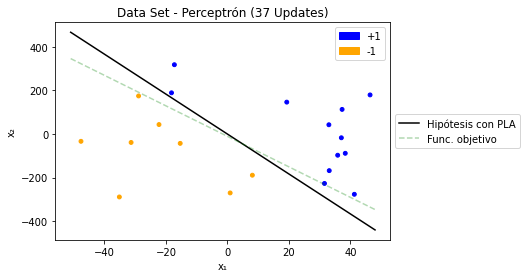

In [203]:
#Ejecutar el algoritmo de aprendizaje del perceptrón
w, it= PLA(dataSet)
#Graficar
colormap=np.array([0, 'blue','orange'])
#Data set
plt.scatter(dataSet[0], dataSet[1], s=15, c=colormap[dataSet[2].astype(int)])
#Graficar recta con los pesos obtenidos con PLA
#x1= np.array(range(int(plt.xlim()[0]), int(plt.xlim()[1])))
x1= line[0]
plt.plot(x1, -w[1]/w[2]*x1+(-w[0]/w[2]), label='Hipótesis con PLA', color='black')
plt.plot(line[0], line[1], 'g--', alpha=0.3, label='Func. objetivo')
# Título
plt.title('Data Set - Perceptrón ('+str(it)+' Updates)')
# Etiquetas
plt.xlabel('x₁')
plt.ylabel('x₂')
pop_a = mpatches.Patch(color='blue', label='+1')
pop_b = mpatches.Patch(color='orange', label='-1')
leg1= plt.legend(handles=[pop_a, pop_b])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().add_artist(leg1)
# Mostrar gráfica
plt.show()

El número de actualizaciones está en el título del gráfico y la hipótesis generada por *PLA* es similar a la función objetivo y, aunque usualmente no es exactamente la misma, sigue dando una solución válida.
 
**c.** Repetir todo lo hecho en **b.** con otros datos generados aleatoriamente de tamaño 20. Comparar los resultados.

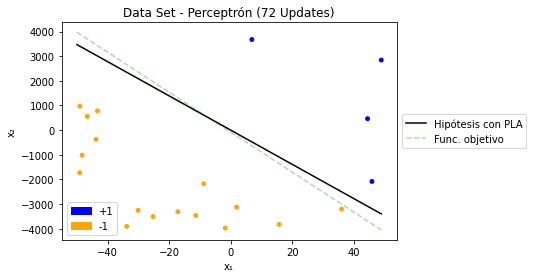

In [204]:
#Generar nuevo Data Set
dataSet, line= genDataSet(20)
#Ejecutar el algoritmo de aprendizaje del perceptrón
w, it= PLA(dataSet)
#Graficar
colormap=np.array([0, 'blue','orange'])
#Data set
plt.scatter(dataSet[0], dataSet[1], s=15, c=colormap[dataSet[2].astype(int)])
#Graficar recta con los pesos obtenidos con PLA
#x1= np.array(range(int(plt.xlim()[0]), int(plt.xlim()[1])))
x1= line[0]
plt.plot(x1, -w[1]/w[2]*x1+(-w[0]/w[2]), label='Hipótesis con PLA', color='black')
plt.plot(line[0], line[1], 'g--', alpha=0.3, label='Func. objetivo')
# Título
plt.title('Data Set - Perceptrón ('+str(it)+' Updates)')
# Etiquetas
plt.xlabel('x₁')
plt.ylabel('x₂')
pop_a = mpatches.Patch(color='blue', label='+1')
pop_b = mpatches.Patch(color='orange', label='-1')
leg1= plt.legend(handles=[pop_a, pop_b])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().add_artist(leg1)
# Mostrar gráfica
plt.show()

Aunque varía número de *updates* y cambia un poco lo similar que es la hipótesis a la objetivo, los resultados muestran que el algoritmo sigue funcionando.

**d.** Repetir todo lo hecho en **b.** con otros datos generados aleatoriamente de tamaño 100. Comparar con los resultados de **b**.

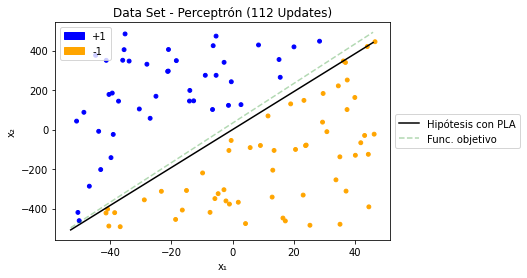

In [205]:
#Generar nuevo Data Set
dataSet, line= genDataSet(100)
#Ejecutar el algoritmo de aprendizaje del perceptrón
w, it= PLA(dataSet)
#Graficar
colormap=np.array([0, 'blue','orange'])
#Data set
plt.scatter(dataSet[0], dataSet[1], s=15, c=colormap[dataSet[2].astype(int)])
#Graficar recta con los pesos obtenidos con PLA
#x1= np.array(range(int(plt.xlim()[0]), int(plt.xlim()[1])))
x1= line[0]
plt.plot(x1, -w[1]/w[2]*x1+(-w[0]/w[2]), label='Hipótesis con PLA', color='black')
plt.plot(line[0], line[1], 'g--', alpha=0.3, label='Func. objetivo')
# Título
plt.title('Data Set - Perceptrón ('+str(it)+' Updates)')
# Etiquetas
plt.xlabel('x₁')
plt.ylabel('x₂')
pop_a = mpatches.Patch(color='blue', label='+1')
pop_b = mpatches.Patch(color='orange', label='-1')
leg1= plt.legend(handles=[pop_a, pop_b])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().add_artist(leg1)
# Mostrar gráfica
plt.show()

Al ejecutar con 100 datos, algunas veces el algoritmo termina por la condición máxima de iteraciones (10000) y por tanto no da un buen resultado, eso ocurre cuando hay muchos datos muy cerca de la función objetivo. Además, el tiempo de cómputo en general dura más y la hipótesis varía menos de la función objetivo. Más allá de lo anterior el algoritmo sigue funcionando. 

**e.** Repetir todo lo hecho en **b.** con otros datos generados aleatoriamente de tamaño 1000. Comparar con los resultados de **b**.

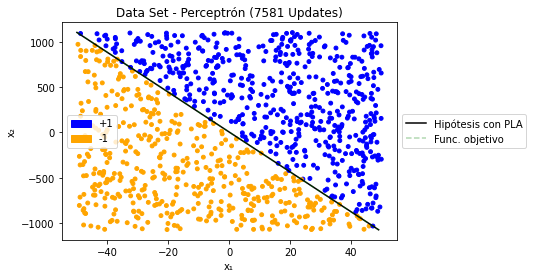

In [208]:
#Generar nuevo Data Set
dataSet, line= genDataSet(1000)
#Ejecutar el algoritmo de aprendizaje del perceptrón
w, it= PLA(dataSet)
#Graficar
colormap=np.array([0, 'blue','orange'])
#Data set
plt.scatter(dataSet[0], dataSet[1], s=15, c=colormap[dataSet[2].astype(int)])
#Graficar recta con los pesos obtenidos con PLA
#x1= np.array(range(int(plt.xlim()[0]), int(plt.xlim()[1])))
x1= line[0]
plt.plot(x1, -w[1]/w[2]*x1+(-w[0]/w[2]), label='Hipótesis con PLA', color='black')
plt.plot(line[0], line[1], 'g--', alpha=0.3, label='Func. objetivo')
# Título
plt.title('Data Set - Perceptrón ('+str(it)+' Updates)')
# Etiquetas
plt.xlabel('x₁')
plt.ylabel('x₂')
pop_a = mpatches.Patch(color='blue', label='+1')
pop_b = mpatches.Patch(color='orange', label='-1')
leg1= plt.legend(handles=[pop_a, pop_b])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().add_artist(leg1)
# Mostrar gráfica
plt.show()

Con mil datos ocurre en muchas más ocasiones que el algoritmo porque supera el número de iteraciones y normalmente el cómputo del algoritmo se demora mucho más. Además, con este caso prácticamente el algoritmo debe devolver la misma función objetivo para que todo quede bien clasificado.

**f.** Modificar el algorimo para que tome datos en $\mathbb{R}^{10}$ en lugar de $\mathbb{R}^{2}$. Generar aleatoriamente datos linealmente separables de tamaño 1000 para que alimenten el algoritmo. ¿Cuántas actualizaciones toma el algorimo pata converger?

In [209]:
#Función que genera los puntos del data set con una func. obj. aleatoria con dimensión
##Devuelve una matriz (dim+1)xnumData con las coordenadas de los puntos y el valor al que es mapeado
def genDataSetD(numData, dim, rang=100):
  #Generar coeficientes función objetivo (hiperplano)
  opc= np.array(range(-100, 100))
  noise= np.random.rand(1, dim+1)
  coeff= np.random.choice(opc, dim+1) + noise 
  #Inicializar matriz
  data= np.zeros((dim+1,numData))
  #Obtener rango para cada dimensión
  dimArr= np.array(range(-rang, rang))
  #Llenar la matriz
  for i in range(numData):
    #Elegir aleatoriamente coordenadas (ruido para que haya coordenadas reales)
    x= np.zeros((dim+1, 1))
    for j in range(dim):
      noise= np.random.random_sample() #[0, 1)
      x[j] = np.random.choice(dimArr) + noise
    #Último coeficiente representa el término independiente.
    x[dim]=1
    #Valor de +1 y -1 segun region de hiperplano
    ans= 1 if coeff.dot(x)>0 else -1
    x[dim] =ans
    data[:,i] = x.flatten()
  
  return (data, coeff.flatten())

#Función de aprendizaje para el perceptrón con dimensión
##Retorna vector de w con los pesos
def PLAD(dataSet, dim, maxIt=100000):
  #Transponer dataSet para mayor comodidad
  dataSet= dataSet.transpose()
  #Tomar aleatoriamente w(0) [0,1]
  w= np.random.rand(1,dim+1)
  t=0
  updates= 0
  n= int(dataSet.size/(dim+1))
  M=np.array([1])
  while t<maxIt:
    M=np.empty((0,dim+2))
    #Ver que punto está mal clasificados
    for i in range(n):
      x_i= np.append([1], dataSet[i][:-1])
      if dataSet[i][dim]*w.dot(x_i) <= 0:
        row= np.append(x_i, [dataSet[i][dim]], axis=0)
        M= np.append(M, [row.transpose()], axis=0)
        updates= updates+1
        break
    #Todos bien, entonces para ahí
    if M.size==0:
      break
    #Sumarlos todos para obtener el ajuste
    ajuSum = M[0][(dim+1)]*M[0][:(dim+1)]
    #Correción de pesos
    w= w+ajuSum
    t= t+1
  #print(updates)
  #print(t)
  return (w.flatten(), t)

#Prueba con 1000 datos
data, coeff= genDataSetD(1000,10)
w, t= PLAD(data, 10) 
print('*****COEF DE FUNC. OBJETIVO*****')
print(coeff)
print('*****COEF. RETORNADOS POR PLA*****')
print(w)
print('**********')
print('Actualizaciones', t)

*****COEF DE FUNC. OBJETIVO*****
[-47.1493202   33.06713813 -73.64954385 -10.57789404 -73.79215667
  98.31255094  27.44823029  67.89230042 -38.59649157  45.8874058
  36.18498373]
*****COEF. RETORNADOS POR PLA*****
[ 3398.62086794 -4318.45860597  3061.12539268 -6828.09907813
  -978.07665628 -6819.90280129  9035.28080268  2518.37355435
  6210.30535625 -3398.88241956  4234.20077216]
**********
Actualizaciones 13332


En la ejecución del código anterior se puede ver el número de actualizaciones que hizo el algoritmo, suele tomar de 1000 a 20000 *updates*. Aunque los coeficientes no se parezcan, si las actualizaciones no fueron más de 100000, significa que los pesos de $w$ son válidos.

**g.** Repite el algoritmo para el mismo *data set* de **f** para 100 experimentos. En las iteraciones de cada experimeto selecciona un $x(t)$ aleatoriamente. Graficar un histograma del número de actualizaciones que gastó el algoritmo para converger. 

(array([ 2.,  4., 10., 14., 22., 21., 19.,  2.,  5.,  1.]),
 array([ 3927. ,  4866.2,  5805.4,  6744.6,  7683.8,  8623. ,  9562.2,
        10501.4, 11440.6, 12379.8, 13319. ]),
 <a list of 10 Patch objects>)

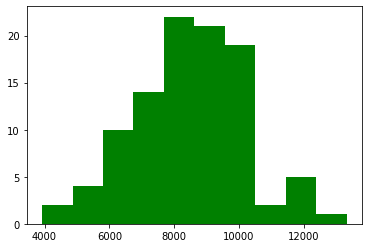

In [216]:
def PLADran(dataSet, dim, maxIt=100000):
  #Transponer dataSet para mayor comodidad
  dataSet= dataSet.transpose()
  #Tomar aleatoriamente w(0) [0,1]
  w= np.random.rand(1,dim+1)
  t=0
  updates= 0
  n= int(dataSet.size/(dim+1))
  M=np.array([1])
  while t<maxIt:
    M=np.empty((0,dim+2))
    #Ver que punto está mal clasificado aleatoriamente
    #poniendo aleatoriamente los índices a visitar 
    rng = np.random.default_rng()
    randomRan = np.array(range(n))
    rng.shuffle(randomRan)
    for i in randomRan: 
      x_i= np.append([1], dataSet[i][:-1])
      if dataSet[i][dim]*w.dot(x_i) <= 0:
        row= np.append(x_i, [dataSet[i][dim]], axis=0)
        M= np.append(M, [row.transpose()], axis=0)
        updates= updates+1
        break
    #Todos bien, entonces para ahí
    if M.size==0:
      break
    #Sumarlos todos para obtener el ajuste
    ajuSum = M[0][(dim+1)]*M[0][:(dim+1)]
    #Correción de pesos
    w= w+ajuSum
    t= t+1
  #print(updates)
  #print(t)
  return (w.flatten(), t)

numUpdates=[]
for i in range(100):
  _, t= PLADran(data, 10) 
  numUpdates.append(t)

plt.hist(numUpdates, color='g')

**h.** Resumen de conclusiones respecto a la presición y el tiempo de ejecución como funciones en términos de $N$ y $d$.

**Respuesta** Respecto a la presición, por lo que se pudo ver, es que depende del número de datos porque a menos datos más posibilidades hay que existan funciones de hipótesis que no sean la objetivo que funcionen. En este aspecto la dimensión supongo que hace algo similar. Lo que sí podía suseder es que hubieran errrores a la hora de generar el *data set*, por lo que la solución que retornaba el algoritmo era incorrecta.

Ahora bien, en cuanto el tiempo de ejecución, seguramente depende de ambas, ya que se incrementaban las actualizaciones (y por tanto el tiempo) del algoritmo si $d$ o $N$ aumentaban. 

#**4. Problema 1.6**
Considerar una muestra de 10 canicas sacadas de un recipiente que tiene canicas rojas y verdes. La probabilidad de sacar una canica roja es $\mu$.
Para $\mu=0.05$, $\mu=0.5$ y $\mu=0.8$, calcular la probabilidad de no obtener bolas rojas ($\nu=0$) para los siguientes casos:
 
>**a.** Se saca sólo una muestra. Calcular la probabilidad de que $\nu=0$.
**R/.** Como la probabilidad de sacar una canica roja es $1-\mu$, entonces la probabilidad de sacar 10 seguidas es claramente $(1-\mu)^{10}$. Luego:
* Con $\mu=0.05$, tenemos que **P**$(\nu=0)=0.5987$
* Para $\mu=0.5$, tenemos que **P**$(\nu=0)=0.0009$
* Con $\mu=0.8$, tenemos que **P**$(\nu=0)=0.0000001$
 
>**b.** Se extraen 1000 muestras independientes. Calcular la probabilidad de que (al menos) una de las muestras tenga $\nu=0$.
**R/.** La probabilidad de que al menos una de las muestras de $n$ tenga $\nu=0$ es lo mismo que 1 menos la probabilidad de que todas las muestras tengan alguna canica roja ($\nu>0$). Entonces, la probabilidad de que en una muestra haya una canica roja es $1-(1-\mu)^{10}$, y como las $n$ muestras son independientes, basta con multiplicar la probabilidad $n$ veces para obtener el resultado, esto es:
$$(1-(1-\mu)^{10})^n.$$
Finalmente, la probabilidad de que en $n$ muestras haya al menos con todas las canicas verdes es
$$1-(1-(1-\mu)^{10})^n.$$ 
Así, con n=1000:
* Con $\mu=0.05$, tenemos que $1-$**P**$(\nu>0$ en 1000 muestras$)=1$
* Para $\mu=0.5$, tenemos que $1-$**P**$(\nu>0$ en 1000 muestras$)=0.6235$
* Con $\mu=0.8$, tenemos que $1-$**P**$(\nu>0$ en 1000 muestras$)=0.0001$
 
>**c.** Lo mismo que en **b.** pero con 1000000 de muestras independientes.
**R/.** En el punto anterior se resolvió el problema para $n$ muestras independientes, por lo tanto:
* Con $\mu=0.05$, tenemos que $1-$**P**$(\nu>0$ en $10^6$ muestras$)=1$
* Para $\mu=0.5$, tenemos que $1-$**P**$(\nu>0$ en $10^6$ muestras$)=1$
* Con $\mu=0.8$, tenemos que $1-$**P**$(\nu>0$ en $10^6$ muestras$)=0.097$

#**6. Problema 1.12**
Este problema analiza cómo el cambiar la medida de error puede cambiar el resultado del proceso de aprendizaje. Hay N *data points* $y_1\leq y_2 \leq \cdots \leq y_N$ y queremos estimar un valor "representativo".
 
**a.** Si el algoritmo va a encontrar una hipótesis $h$ que minimice la *in-sample sum* de las desviaciones al cuadrado,
$$E_{in}(h)=\sum^N_{n=1}(h-y_n)^2,$$
entonces demuestre que el estimado será el promedio *in-sample*,
$$h_{mean}=\frac{1}{N}\sum^N_{n=1}y_n.$$
**Respuesta.** Para minimizar $E_{in}(h)$ el primer paso es encontrar los puntos críticos de la función, lo que se hace derivando con respecto a $h$ e igualando a 0, obteniendo así:
>Punto crirtico en $h$ $\iff$ $2\sum^N_{n=1}(h-y_n)=0,$
por lo tanto:
$$\sum^N_{n=1}(h-y_n)=0,$$
y despejando para $h$
$$Nh-\sum^N_{n=1}y_n=0$$
$$\implies h=\frac{1}{N}\sum^N_{n=1}y_n$$
 
Luego, deducimos que $h$ en ese punto es mínimo por el criterio de la segunda derivada,
$$E_{in}''(h)=2\sum^N_{n=1}1=2N>0.$$
Así, si $h=h_{mean}$ entonces $h$ es mínimo para $E_{in}(h)$, luego es una buen estimado para minimizar el error.
 
**b.** Si el algoritmo va a encontrar una hipótesis $h$ que minimice la *in-sample sum* del valor absoluto de las desviaciones,
$$E_{in}(h)=\sum^N_{n=1}|h-y_n|,$$
entonces demuestre que el estimado será una mediana *in-sample*, $h_{med}$, que es el valor en que que justo la mitad de los datos son como máximo $h_{med}$ y la otra mitad es como mínimo $h_{med}$.
 
**Respuesta.** Similarmente al anterior, derivando se encuentran los posibles puntos críticos cuando $\sum^N_{n=1}$**sign**$(h-y_n)$=0. Así, justamente el valor que hace que sea cero es en el que justo la mitad de los datos son como máximo $h_{med}$ (haciendo que la resta sea positiva) y la otra mitad es como mínimo $h_{med}$ (haciendo que la resta sea negativa) y, por lo tanto, sumando un total de 0. 
 
Intuitivamente para el caso en la recta real, si ordenamos de menor a mayor los $y_i$ y nos paramos en media midiendo las distancias a los otros puntos desde ahí, tiene sentido ver que, por más de que cambiemos el punto desde que se mide, el total de la suma de las distancias no puede decrecer porque lo que me mueva a alguno de los lados se va adicionar a todos los puntos del lado opuesto al que me moví.
 
 
**c.** Supongamos que $y_N$ es perturbado con $y_N+\epsilon$, donde $\epsilon\to\infty$. Entonces $y_N$ se convierte en un punto atípico. ¿Qué pasa con los estimadores $h_{mean}$ y $h_{med}$?

**Respuesta.** Si $y_N$ es perturbado es perturbado de esa forma entonces $h_{mean}\to\infty$ porque $y_N$ es un término del promedio. Sin embargo, $h_{med}$ no cambiaría porque basta con que se siga cumpliendo que $h_{med}<y_N$.


#**5. Problema 1.9 - (Incompleto)**
*Incompleto*

Para este problema, deducimos una cota exponencial de una forma de la ley de los grandes números, llamada la cota de Chernoff. Nos centraremos en el caso de lanzar una moneda justa.
 
**a.** Sea $t$ una variable aleatoria finita, $\alpha$ una constante positiva y $s$ un parámetro positivo. Si $T(s)=$**E**$(e^{st})$, probar que 
>**P**$[t\geq a]\leq e^{-sa}T(s).$
 
**Respuesta.** Como $e^{st}$ es monótono creciente en $t$, directamente podemos deducir que **P**$[t\geq a]\leq $**E**$(e^{st}) \frac{1}{e^{sa}}=e^{-sa}T(s)$ por la desigualdad de Markov.